## Random Forest Classification

In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [9]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250
df1 = pd.read_csv('NonMotor_SocioBehavior_Categorized_Edit.csv')
df1['APPRDX'] = df1['APPRDX'] -1
print(df1.shape)
df1.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250
(250, 46)


,APPRDX,Benton,COGSTATE,Clock,Epworth,Geriatric_Depression,Hopkins,Hopkins_Recog,LetterNumber,Lexical_Fluency,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,0,0,1,1,0,0,1,1,...,1,0,1,0,2,1,1,1,1,2
1,1,0,1,0,0,1,0,0,1,1,...,0,1,0,0,1,2,2,1,1,0


In [11]:
%cd Z:\PPMI_Data\Excels\CollaborativeFiltering
df2 = pd.read_csv('Feats45_unCateg_APPRDX.csv')
df2 = df2.drop(['PATNO','Patient_ID'], axis=1)
df2['APPRDX'] = df2['APPRDX'] -1
print(df2.shape)
df2.head(2)

Z:\PPMI_Data\Excels\CollaborativeFiltering
(250, 46)


,APPRDX,Anxiety,Apathy,Benton,Clock,Cognition,COGSTATE,Constipate,Depress,DopaDefic,...,Semantic,SleepDay,SleepNight,STAIA,STAIS,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT,Urine
0,0,1,0,12.16,7,1,1,1,1,0,...,57,1,0,45,59,47.5,110,204,17,1
1,0,1,1,7.76,6,1,1,0,0,0,...,36,1,3,40,39,52.0,27,52,9,0


In [16]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250
df3 = pd.read_csv('NonMotor_SocioBehavior_Categorized_EditRaw_Gender.csv')
df3 = df3.drop(['PATNO','Gender'], axis=1)
df3['APPRDX'] = df3['APPRDX'] -1
print(df3.shape)
df3.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250
(250, 46)


,APPRDX,Benton,COGSTATE,Clock,Epworth,Geriatric_Depression,Hopkins,Hopkins_Recog,LetterNumber,Lexical_Fluency,...,SCOPA_Sex,Semantic,Education,Hand,STAIS,STAIA,Symbol_Digit,Trail_Making_A,Trail_Making_B,UPSIT
0,0,0,0,0,1,1,0,0,1,1,...,1,0,1,0,2,1,1,1,1,2
1,1,0,1,0,0,1,0,0,1,1,...,0,1,0,0,1,2,2,1,1,0


## Multiple ROC-AUC in one plot

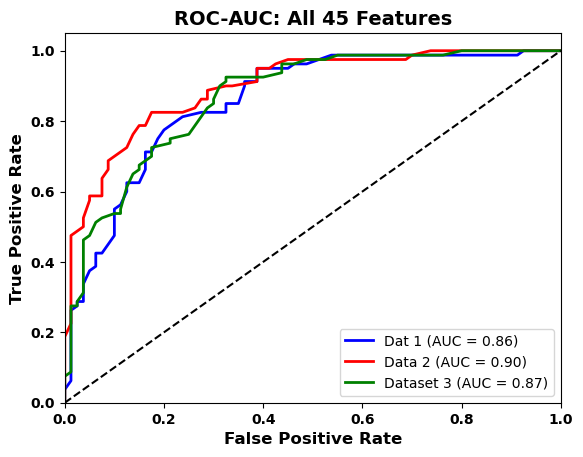

In [21]:
# Create a list of colors for each dataset
colors = ['b', 'r', 'g']

# Define the names for each dataset in the legend
dataset_names = ['Dat 1', 'Data 2', 'Dataset 3']

# Loop over the datasets and plot the ROC curves
for i, dataset in enumerate([df1, df2, df3]):
    # Sample the data
    dataset_sampled = dataset.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
    X = dataset_sampled.iloc[:, 1:].values
    y = dataset_sampled.iloc[:, 0].values

    # Fit the model
    classifier = RandomForestClassifier(n_estimators=100, criterion='gini')
    y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

    # Calculate the false positive rate and true positive rate for different thresholds
    fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

    # Calculate the area under the ROC curve
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve with the updated legend label
    plt.plot(fpr, tpr, color=colors[i], lw=2, label='%s (AUC = %0.2f)' % (dataset_names[i], roc_auc))

# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], color='k', lw=1.5, linestyle='--')

# Set the plot parameters
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC-AUC: All 45 Features', fontweight='bold', fontsize=14)
plt.legend(loc="lower right")

# Save the plot as SVG and PDF files
# plt.savefig('ROC_AUC_All45Features_Categ.svg')
# plt.savefig('ROC_AUC_All45Features_Categ.pdf')

# Show the plot
plt.show()


## Different sample for each dataframe df1, df2, df3

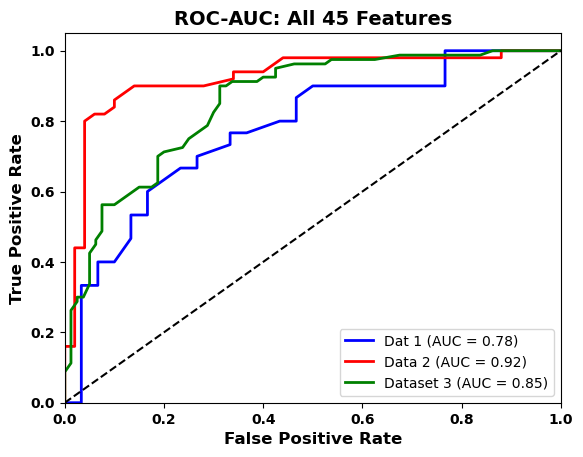

In [22]:
# Create a list of colors for each dataset
colors = ['b', 'r', 'g']

# Define the names for each dataset in the legend
dataset_names = ['Dat 1', 'Data 2', 'Dataset 3']

# Loop over the datasets and plot the ROC curves
for i, dataset in enumerate([df1, df2, df3]):
    # Sample the data
    if i == 0:
        dataset_sampled = dataset.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
    elif i == 1:
        dataset_sampled = dataset.groupby('APPRDX').apply(lambda x: x.sample(50, random_state=1))
    else:
        dataset_sampled = dataset.groupby('APPRDX').apply(lambda x: x.sample(80, random_state=1))
    
    X = dataset_sampled.iloc[:, 1:].values
    y = dataset_sampled.iloc[:, 0].values

    # Fit the model
    classifier = RandomForestClassifier(n_estimators=100, criterion='gini')
    y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

    # Calculate the false positive rate and true positive rate for different thresholds
    fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

    # Calculate the area under the ROC curve
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve with the updated legend label
    plt.plot(fpr, tpr, color=colors[i], lw=2, label='%s (AUC = %0.2f)' % (dataset_names[i], roc_auc))

# Plot the diagonal line (random guess)
plt.plot([0, 1], [0, 1], color='k', lw=1.5, linestyle='--')

# Set the plot parameters
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=12)
plt.title('ROC-AUC: All 45 Features', fontweight='bold', fontsize=14)
plt.legend(loc="lower right")

# Save the plot as SVG and PDF files
# plt.savefig('ROC_AUC_All45Features_Categ.svg')
# plt.savefig('ROC_AUC_All45Features_Categ.pdf')

# Show the plot
plt.show()
